<a href="https://colab.research.google.com/github/msrosyabreu/PROJECTS-RA/blob/main/CapstoneProjectRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Start with importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msrosyabreu/PROJECTS-RA/main/AIRBNB%20NYC%202019%20data.csv')
#Analysis of 2019 Airbnb listings in New York City 
#The goal of this project for me was to understand and get an idea of which areas are most popular and decent in pricing. 

#Below's function shows the first 5 rows of the data frame to quickly view your data.
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Below's function detects missing values in the data.
#false indicates no missing values & true indicates missing values found in this data. 
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv('https://raw.githubusercontent.com/msrosyabreu/PROJECTS-RA/main/AIRBNB%20NYC%202019%20data.csv', na_values = missing_values)
df.fillna(0,inplace=True)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [ ]:
df = df.rename(columns={'id': 'Property ID' , 'name': 'Airbnb Place Name' , 'host_id': 'Host ID' , 'host_name': 'Host Name' , 'neighbourhood_group': 'Borough of Location' , 'neighbourhood': 'Neighborhood' , 'latitude': 'Latitude' , 'longitude': 'Longitude' , 'price': 'Price' , 'room_type': 'Type of Place' , 'minimum_nights': 'Minimum Nights' , 'number_of_reviews': 'Number of Reviews' , 'last_review': 'Last Review' , 'reviews_per_month': 'Reviews per Month' , 'calculated_host_listings_count': 'Host Listings Count' , 'availability_365': 'Availability of Days'})
df

,Property ID,Airbnb Place Name,Host ID,Host Name,Borough of Location,Neighborhood,Latitude,Longitude,Type of Place,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Host Listings Count,Availability of Days
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [ ]:
df.dtypes

Property ID               int64
Airbnb Place Name        object
Host ID                   int64
Host Name                object
Borough of Location      object
Neighborhood             object
Latitude                float64
Longitude               float64
Type of Place            object
Price                     int64
Minimum Nights            int64
Number of Reviews         int64
Last Review              object
Reviews per Month       float64
Host Listings Count       int64
Availability of Days      int64
dtype: object

In [ ]:
#Below's function is used to remove and analyze rows or columns. 
df.dropna()

,Property ID,Airbnb Place Name,Host ID,Host Name,Borough of Location,Neighborhood,Latitude,Longitude,Type of Place,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Host Listings Count,Availability of Days
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [ ]:
#Below's drop functions, first one drops rows with a count of 0 and the second one drops the column named Record Type.
drop_cols =['Latitude' , 'Longitude']
df.drop(drop_cols, inplace=True, axis=1)

In [ ]:
df.describe()

,Property ID,Host ID,Price,Minimum Nights,Number of Reviews,Reviews per Month,Host Listings Count,Availability of Days
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Below's function shows the mean of all columns.
df.mean()

Property ID             1.901714e+07
Host ID                 6.762001e+07
Price                   1.527207e+02
Minimum Nights          7.029962e+00
Number of Reviews       2.327447e+01
Reviews per Month       1.090910e+00
Host Listings Count     7.143982e+00
Availability of Days    1.127813e+02
dtype: float64

In [ ]:
df.max()

Property ID                  36487245
Host ID                     274321313
Borough of Location     Staten Island
Neighborhood                 Woodside
Type of Place             Shared room
Price                           10000
Minimum Nights                   1250
Number of Reviews                 629
Reviews per Month                58.5
Host Listings Count               327
Availability of Days              365
dtype: object

In [ ]:
df.min()

Property ID                        2539
Host ID                            2438
Borough of Location               Bronx
Neighborhood                   Allerton
Type of Place           Entire home/apt
Price                                 0
Minimum Nights                        1
Number of Reviews                     0
Reviews per Month                     0
Host Listings Count                   1
Availability of Days                  0
dtype: object

In [ ]:
df['Price'].mean()

152.7206871868289

In [ ]:
#Below's function filtered the data to be looked at by the Borough of Location and Manhattan. 
df[df['Borough of Location'].str.contains('Manhattan')]

,Property ID,Airbnb Place Name,Host ID,Host Name,Borough of Location,Neighborhood,Type of Place,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Host Listings Count,Availability of Days
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,0.00,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,6/24/2019,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,Entire home/apt,200,6,0,0,0.00,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,Private room,125,4,0,0,0.00,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,0,0.00,6,2


In [ ]:
df.groupby(['Type of Place'])['Price'].sum()

Type of Place
Entire home/apt    5381480
Private room       2004450
Shared room          81348
Name: Price, dtype: int64

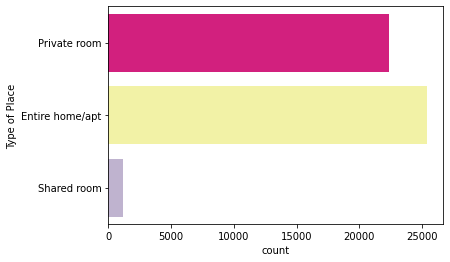

In [ ]:
sns.countplot(y='Type of Place',data=df, palette="Accent_r")

In [ ]:
df.groupby(['Borough of Location'])['Price'].mean()

Borough of Location
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: Price, dtype: float64

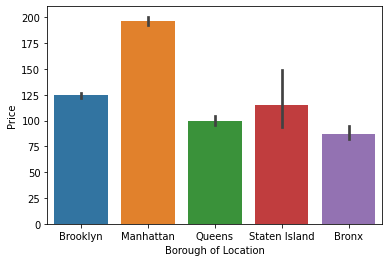

In [ ]:
sns.barplot(x = 'Borough of Location' , y ='Price' , data =df)

In [ ]:
df['Price'].mean()

152.7206871868289

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


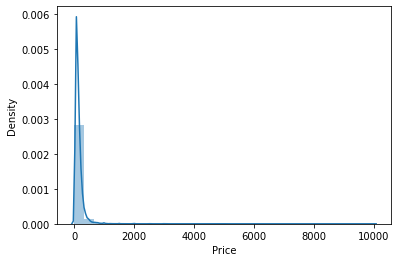

In [ ]:
#This shows the distribution of the numbers of meds.
sns.distplot(df['Price'], bins = 30)
plt.show()

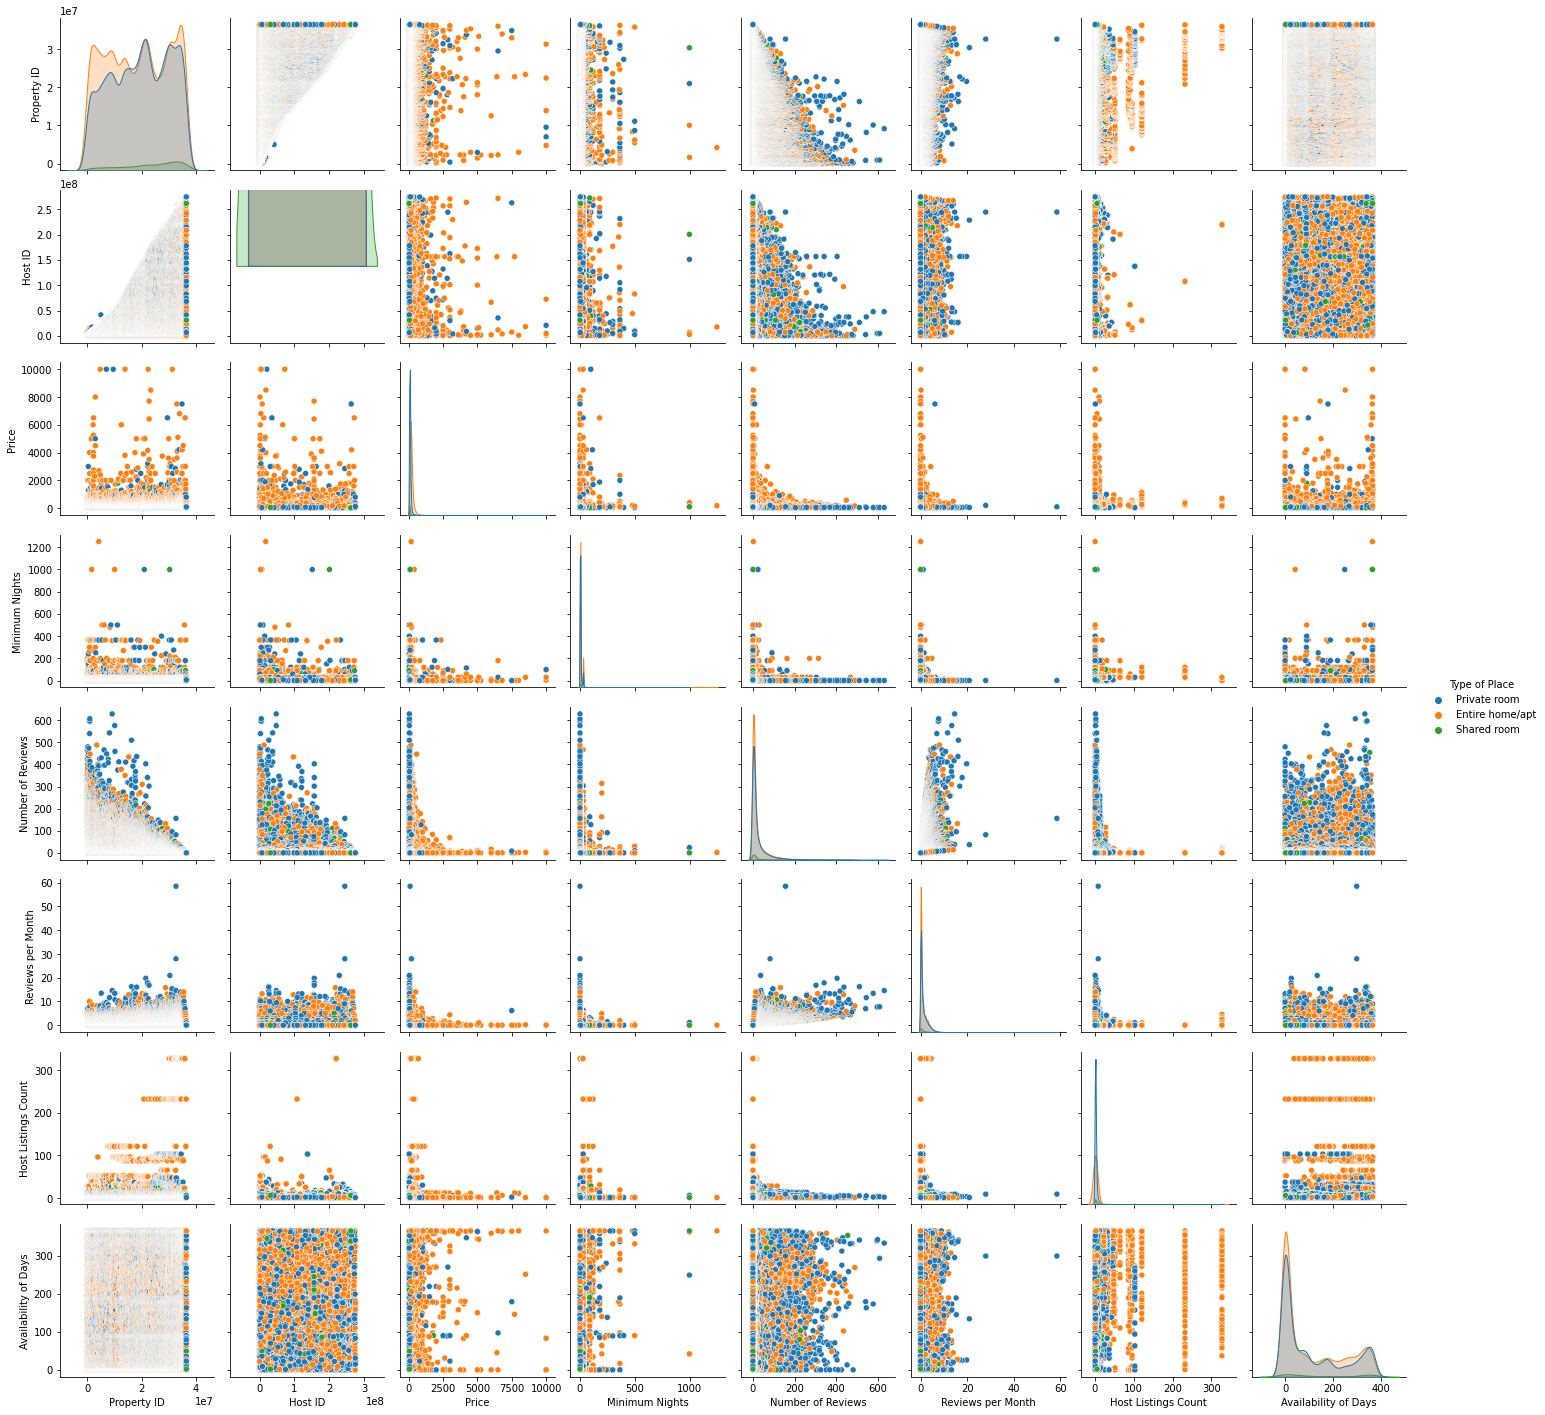

In [ ]:
sns.pairplot(df, hue='Type of Place')

In [ ]:
df[df['Borough of Location'] == 'Queens']

,Property ID,Airbnb Place Name,Host ID,Host Name,Borough of Location,Neighborhood,Type of Place,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Host Listings Count,Availability of Days
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,Private room,130,3,248,7/1/2019,2.25,1,215
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,Private room,70,30,25,5/31/2019,0.22,1,324
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,Private room,140,2,1,9/19/2011,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,Private room,79,30,28,4/12/2019,0.26,1,126
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,Entire home/apt,350,8,10,5/12/2019,0.11,5,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48858,36458668,"2beds Private Room Step to LGA, CitiFiled, Mid...",217463199,Marvy,Queens,Flushing,Private room,68,3,0,0,0.00,4,362
48863,36469741,Comfortable & Big room with 2 beds!,274012871,Stefan,Queens,Long Island City,Private room,93,2,0,0,0.00,2,14
48866,36472710,CozyHideAway Suite,274225617,Alberth,Queens,Briarwood,Entire home/apt,58,1,0,0,0.00,1,159
48878,36479723,Room for rest,41326856,Jeerathinan,Queens,Elmhurst,Private room,45,1,0,0,0.00,5,172
